# Neural Network

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mnist_get_images import get_images

%matplotlib inline

In [112]:
mnist_path = './mnist_raw/'

In [113]:
X_train_num, y_train_num, X_test_num, y_test_num = get_images(mnist_path)
# Testing data
print(f'Training data dimensions: {X_train_num.shape} \nTesting data dimensions: {X_test_num.shape}')

Training data dimensions: (60000, 28, 28) 
Testing data dimensions: (10000, 28, 28)


## Images to vectors in float32

In this section, the data is prepared and split for training, validation, and testing of a neural network.

1. `X_train` and `y_train`: The first 50,000 examples from the original training data (`X_train_num` and `y_train_num`) are selected, reshaped, and normalized to be used for model training.
2. `x_validation` and `y_validation`: The last 10,000 examples from the original training data are selected to be used as the validation set.
3. `X_test` and `y_test`: The original test data (`X_test_num` and `y_test_num`) are copied and reshaped to be used for the final evaluation of the model.

Additionally, the maximum values of `X_train` and the shapes of the datasets `X_train`, `y_train`, `X_test`, and `y_test` are printed to verify that the data preparation has been done correctly.

In [ ]:
X_train = X_train_num[:50_000].reshape(50_000, -1).astype(np.float32)/255
y_train = y_train_num[:50_000].reshape(50_000, 1)

x_validation = X_train_num[50_000:].reshape(10_000, -1).astype(np.float32)/255
y_validation = y_train_num[50_000:].reshape(10_000, 1)

X_test = X_test_num.copy().reshape(10_000, -1).astype(np.float32)/255
y_test = y_test_num.copy().reshape(10_000, 1)

# Testing set
print(f'X_train: {X_train.max()} \n')

# Shape
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: 1.0 

X_train: (50000, 784)
y_train: (50000, 1)
X_test: (10000, 784)
y_test: (10000, 1)


## Graph image

In [115]:
def plot_img_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

The image shown corresponds to: [5]


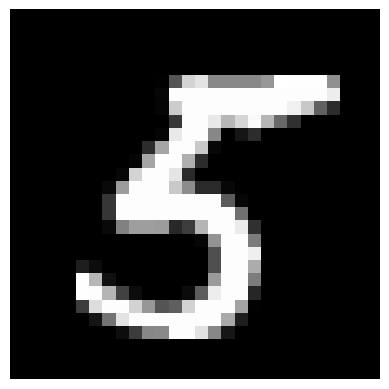

In [116]:
rand_idx = np.random.randint(len(y_test))
print(f'The image shown corresponds to: {y_test[rand_idx]}')
plot_img_number(X_test_num[rand_idx])

### Forward Propagation and Cost Function in Neural Networks

This set of equations describes the flow of a simple neural network model, consisting of an input layer, a hidden layer with ReLU activation function, and an output layer with Softmax activation function for classification. Then, the cross-entropy loss function is used to calculate the error between the predictions and the true values, and finally, the total cost is calculated as the average of the losses across all samples.

1. **Forward Propagation (First Hidden Layer):**

   $$ z^{(1)} = W^{(1)} X + b^{(1)} $$
   
   Where:
   - $ z^{(1)} $ is the linear output of the first layer.
   - $ W^{(1)} $ is the weight matrix of the first layer.
   - $ X $ is the input feature set.
   - $ b^{(1)} $ is the bias vector of the first layer.

2. **Activation (ReLU) in the First Layer:**

   $$ a^{(1)} = \text{ReLU}(z^{(1)}) $$
   
   Where:
   - $ a^{(1)} $ is the output of the ReLU activation function, which applies a non-linear transformation to $ z^{(1)} $.

3. **Forward Propagation (Second Output Layer):**

   $$ z^{(2)} = W^{(2)} a^{(1)} + b^{(2)} $$
   
   Where:
   - $ z^{(2)} $ is the linear output of the second layer.
   - $ W^{(2)} $ is the weight matrix of the second layer.
   - $ a^{(1)} $ is the output of the first layer after activation.
   - $ b^{(2)} $ is the bias vector of the second layer.

4. **Softmax Activation Function (to obtain the probabilities of each class):**

   $$ \hat{y} = \frac{e^{z_k^{(2)}}}{\sum_j e^{z_j^{(2)}}} $$
   
   Where:
   - $ \hat{y} $ represents the predicted probabilities for each class.
   - $ e^{z_k^{(2)}} $ is the exponential of the output $ z_k^{(2)} $ for a class $ k $.
   - $ \sum_j e^{z_j^{(2)}} $ is the sum of exponentials for all classes $ j $, ensuring that the probabilities sum to 1.

5. **Loss Function (Cross-Entropy):**

   $$ \mathcal{L}(\hat{y}^i, y^i) = -y^i \ln(\hat{y}^i) = -\ln(\hat{y}^i) $$
   
   Where:
   - $ \mathcal{L}(\hat{y}^i, y^i) $ is the loss for sample $ i $.
   - $ y^i $ is the true class value (in one-hot encoding).
   - $ \hat{y}^i $ is the predicted probability for the true class.

6. **Average Cost Function for the Entire Dataset:**

   $$ J(w, b) = \frac{1}{\text{num\_samples}} \sum_{i=1}^{\text{num\_samples}} -\ln(\hat{y}^i) $$
   
   Where:
   - $ J(w, b) $ is the total cost of the model, calculated as the average loss across all samples.
   - $ \text{num\_samples} $ is the total number of samples in the dataset.
   - $ -\ln(\hat{y}^i) $ is the loss for sample $ i $.

## Mini-Batches 

2 layers 200-10

In [117]:
def create_minibatches(mb_size, x, y, shuffle=True):
    """
    x = (number of samples, 784)
    y = (nuumber of samples, 1)
    """
    assert x.shape[0] == y.shape[0], "Error in the number of samples"
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x, y = x[idxs], y[idxs]

    return (
        (x[i : i + mb_size], y[i : i + mb_size]) for i in range(0, total_data, mb_size)
    )

## Init parameters

In [118]:
def init_parameters(input_size, neurons):
    """
    input_size = (input elements, 784)
    neurons = list[200, 10] amount of neurons in every layer
    """
    w1 = np.random.randn(neurons[0], input_size) * 0.001
    b1 = np.zeros((neurons[0], 1))

    w2 = np.random.randn(neurons[1], neurons[0]) * 0.001
    b2 = np.zeros((neurons[1], 1))

    return {"w1": w1, "b1": b1, "w2": w2, "b2": b2}

In [119]:
parameters = init_parameters(28 * 28, [200, 10])
print(f'{parameters["w1"].shape}')
print(f'{parameters["w2"].shape}')
print(f'{parameters["b2"].shape}')

(200, 784)
(10, 200)
(10, 1)


In [120]:
def relu(x):
    return np.maximum(0, x)

In [121]:
def scores(x, parameters, act_function):
    """'
    X has shape (number of pixels, number of samples)
    """
    z1 = parameters["w1"] @ x + parameters["b1"]
    a1 = act_function(z1)  # Return action function
    z2 = parameters["w2"] @ a1 + parameters["b2"]

    return z2, z1, a1

In [122]:
output_scores, z1, a1 = scores(X_train[:64].T, parameters, relu)

In [123]:
X_train[:64].T.shape

(784, 64)

In [124]:
def softmax(x):
    exp_scores = np.exp(x)
    sum_exp_scores = np.sum(exp_scores, axis=0)
    probs = exp_scores / sum_exp_scores
    return probs

In [125]:
def x_entropy(scores, y, batch_size=64):
    probs = softmax(scores)
    y_hat = probs[y. squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size

    return probs, cost

In [126]:
y_train.squeeze()[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [142]:
def backward(probs, x, y, z1, a1, parameters, batch_size=64):
    grads = {}
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # y-hat - y
    dz2 = probs.copy()

    dW2 = dz2 @ a1.T / batch_size
    db2 = np.sum(dz2, axis=1, keepdims=True) / batch_size
    da1 = parameters["w2"].T @ dz2

    dz1 = da1.copy()
    dz1[z1 <= 0] = 0

    dW1 = dz1 @ x
    db1 = np.sum(dz1, axis=1, keepdims=True)

    assert parameters["w1"].shape == dW1.shape, "W1 shape mismatch"
    assert parameters["w2"].shape == dW2.shape, "W2 shape mismatch"
    assert parameters["b1"].shape == db1.shape, "b1 shape mismatch"
    assert parameters["b2"].shape == db2.shape, "b1 shape mismatch"

    grads = {"w1": dW1, "b1": db1, "w2": dW2, "b2": db2}

    return grads

In [143]:
y_hat, cost = x_entropy(output_scores, y_train[:64])
y_hat.shape

(10, 64)

In [144]:
grads = backward(y_hat, X_train[:64], y_train[:64], z1, a1, parameters)

In [145]:
def accuracy(X_data, y_data, mb_size=64):
    correct = 0
    total = 0
    for x, y in create_minibatches(mb_size, X_data, y_data):
        points, _, _ = scores(x.T, parameters, relu)
        y_hat, _ = x_entropy(points, y, batch_size=len(x))

        correct += np.sum(np.argmax(y_hat, axis=0) == y.squeeze())
        total += len(y)

    return correct / total

In [146]:
def train(epochs, parameters, mb_size=64, learning_rate=1e-3):
    for epoch in range(epochs):
        for x, y in create_minibatches(mb_size, X_train, y_train):
            points, z1, a1 = scores(x.T, parameters=parameters, act_function=relu)
            y_hat, cost = x_entropy(points, y, batch_size=len(x))
            grads = backward(y_hat, x, y, z1, a1, parameters, batch_size=len(x))

            # Update parameters
            for param in parameters:
                parameters[param] -= learning_rate * grads[param]

        # Print cost and accuracy for each epoch
        validation_accuracy = accuracy(x_validation, y_validation, mb_size)
        print(f"Epoch {epoch + 1}/{epochs} - Cost: {cost:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

    return parameters


In [147]:
mb_size = 512
learning_rate = 1e-2
epochs = 20
parameters = train(epochs, parameters, mb_size, learning_rate)

Epoch 1/20 - Cost: 0.0257, Validation Accuracy: 0.9779
Epoch 2/20 - Cost: 0.0263, Validation Accuracy: 0.9783
Epoch 3/20 - Cost: 0.0220, Validation Accuracy: 0.9783
Epoch 4/20 - Cost: 0.0266, Validation Accuracy: 0.9773
Epoch 5/20 - Cost: 0.0106, Validation Accuracy: 0.9778
Epoch 6/20 - Cost: 0.0178, Validation Accuracy: 0.9782
Epoch 7/20 - Cost: 0.0149, Validation Accuracy: 0.9778
Epoch 8/20 - Cost: 0.0220, Validation Accuracy: 0.9779
Epoch 9/20 - Cost: 0.0169, Validation Accuracy: 0.9786
Epoch 10/20 - Cost: 0.0178, Validation Accuracy: 0.9782
Epoch 11/20 - Cost: 0.0112, Validation Accuracy: 0.9779
Epoch 12/20 - Cost: 0.0119, Validation Accuracy: 0.9781
Epoch 13/20 - Cost: 0.0183, Validation Accuracy: 0.9777
Epoch 14/20 - Cost: 0.0210, Validation Accuracy: 0.9775
Epoch 15/20 - Cost: 0.0137, Validation Accuracy: 0.9779
Epoch 16/20 - Cost: 0.0224, Validation Accuracy: 0.9780
Epoch 17/20 - Cost: 0.0240, Validation Accuracy: 0.9777
Epoch 18/20 - Cost: 0.0148, Validation Accuracy: 0.9787
E